In [33]:
import os
import sys
import pandas as pd
sys.path.append(os.path.abspath('../Scripts'))
import warnings
warnings.filterwarnings('ignore')
import ipaddress

In [34]:
import Eda as ed

In [35]:
df = 'C:/Users/BEZA/Desktop/week8/Fraud-Detection/Data/Fraud_Data.csv'
ecommerce_df = ed.load_data(df)

2024-10-29 06:51:07,624 - INFO - Attempting to load data from C:/Users/BEZA/Desktop/week8/Fraud-Detection/Data/Fraud_Data.csv
2024-10-29 06:51:08,332 - INFO - Successfully loaded data from C:/Users/BEZA/Desktop/week8/Fraud-Detection/Data/Fraud_Data.csv


In [36]:
ecommerce_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [37]:
ecommerce_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [38]:
ed.data_overview(ecommerce_df)

2024-10-29 06:51:08,653 - INFO - Checking categorical values...
2024-10-29 06:51:08,733 - INFO - Unique values in 'signup_time': ['2015-02-24 22:55:49' '2015-06-07 20:39:50' '2015-01-01 18:52:44' ...
 '2015-03-03 23:07:31' '2015-07-09 20:06:07' '2015-06-10 07:02:20']
2024-10-29 06:51:08,922 - INFO - Value counts for 'signup_time':
signup_time
2015-02-24 22:55:49    1
2015-03-29 18:25:39    1
2015-07-17 17:19:15    1
2015-03-30 03:33:20    1
2015-05-28 09:37:05    1
                      ..
2015-04-02 06:55:03    1
2015-04-15 10:48:29    1
2015-07-27 03:45:16    1
2015-07-16 21:04:30    1
2015-06-10 07:02:20    1
Name: count, Length: 151112, dtype: int64
2024-10-29 06:51:08,971 - INFO - Unique values in 'purchase_time': ['2015-04-18 02:47:11' '2015-06-08 01:38:54' '2015-01-01 18:52:45' ...
 '2015-05-20 07:07:47' '2015-09-07 09:34:46' '2015-07-21 02:03:53']
2024-10-29 06:51:09,144 - INFO - Value counts for 'purchase_time':
purchase_time
2015-06-08 09:42:04    3
2015-07-17 23:22:55    3
2

In [39]:
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [40]:
ed.clean_data(ecommerce_df)

2024-10-29 06:51:09,685 - INFO - Starting data cleaning process...
2024-10-29 06:51:09,688 - INFO - Initial data shape: (151112, 11)
2024-10-29 06:51:09,693 - INFO - Checking for missing values...
2024-10-29 06:51:09,782 - INFO - Missing values in each column:
Series([], dtype: int64)
2024-10-29 06:51:09,793 - INFO - Checking for duplicates...
2024-10-29 06:51:10,094 - INFO - Removed duplicates: 0 rows removed.


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [41]:
creditcard = 'C:/Users/BEZA/Desktop/week8/Fraud-Detection/Data/creditcard.csv'
creditcard = ed.load_data(creditcard)

2024-10-29 06:51:10,130 - INFO - Attempting to load data from C:/Users/BEZA/Desktop/week8/Fraud-Detection/Data/creditcard.csv
2024-10-29 06:51:13,782 - INFO - Successfully loaded data from C:/Users/BEZA/Desktop/week8/Fraud-Detection/Data/creditcard.csv


In [42]:
creditcard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [43]:
df = 'C:/Users/BEZA/Desktop/week8/Fraud-Detection/Data/IpAddress_to_Country.csv'
ip_country_df = ed.load_data(df)

2024-10-29 06:51:14,019 - INFO - Attempting to load data from C:/Users/BEZA/Desktop/week8/Fraud-Detection/Data/IpAddress_to_Country.csv
2024-10-29 06:51:14,136 - INFO - Successfully loaded data from C:/Users/BEZA/Desktop/week8/Fraud-Detection/Data/IpAddress_to_Country.csv


In [44]:
ip_country_df

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


In [45]:
ip_country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [46]:
ed.clean_data(ip_country_df)

2024-10-29 06:51:14,455 - INFO - Starting data cleaning process...
2024-10-29 06:51:14,458 - INFO - Initial data shape: (138846, 3)
2024-10-29 06:51:14,459 - INFO - Checking for missing values...
2024-10-29 06:51:14,472 - INFO - Missing values in each column:
Series([], dtype: int64)
2024-10-29 06:51:14,478 - INFO - Checking for duplicates...
2024-10-29 06:51:14,551 - INFO - Removed duplicates: 0 rows removed.


,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


In [47]:
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [48]:
ip_country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [49]:

# Convert IP addresses to integer format
ecommerce_df, ip_country_df = ed.convert_ip_to_integer(ecommerce_df, ip_country_df)
# Merge the datasets
merged_data = ed.merge_datasets(ecommerce_df, ip_country_df)

# Save the results
output_filepath = 'merged_ecommerce_data.csv'
ed.save_results(merged_data, output_filepath)

# Display the first few rows of the merged data
print(merged_data.head())


2024-10-29 06:51:14,843 - INFO - Convert IP addresses to integer format for both datasets...
2024-10-29 06:51:14,853 - INFO - Merge eCommerce data with IP country data based on IP ranges...
     user_id          signup_time        purchase_time  purchase_value  \
634   247547  2015-06-28 03:00:34  2015-08-09 03:57:29              47   
635   220737  2015-01-28 14:21:11  2015-02-11 20:28:28              15   
636   390400  2015-03-19 20:49:09  2015-04-11 23:41:23              44   
637    69592  2015-02-24 06:11:57  2015-05-23 16:40:14              55   
638   174987  2015-07-07 12:58:11  2015-11-03 04:04:30              51   

         device_id  source browser sex  age  ip_address  class  \
634  KIXYSVCHIPQBR     SEO  Safari   F   30    16778864      0   
635  PKYOWQKWGJNJI     SEO  Chrome   F   34    16842045      0   
636  LVCSXLISZHVUO     Ads      IE   M   29    16843656      0   
637  UHAUHNXXUADJE  Direct  Chrome   F   30    16938732      0   
638  XPGPMOHIDRMGE     SEO  Chrome 

In [50]:
ecommerce_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3451154526,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2439047221,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2748470523,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3601174708,0


In [51]:
merged_data = 'merged_ecommerce_data.csv'
merged_data = ed.load_data(merged_data)

2024-10-29 06:51:18,254 - INFO - Attempting to load data from merged_ecommerce_data.csv
2024-10-29 06:51:19,043 - INFO - Successfully loaded data from merged_ecommerce_data.csv


In [52]:
merged_data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
0,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,16778864,0,1.677824e+07,1.677926e+07,Australia
1,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,16842045,0,1.680998e+07,1.684275e+07,Thailand
2,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,16843656,0,1.684326e+07,1.684378e+07,China
3,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,16938732,0,1.692467e+07,1.694106e+07,China
4,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,16971984,0,1.694106e+07,1.697382e+07,Thailand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129141,33024,2015-04-12 21:07:04,2015-05-12 22:42:35,56,PRYMTRKRYXEZC,Direct,Opera,F,18,3757992063,0,3.757965e+09,3.758031e+09,China
129142,62132,2015-08-07 10:46:59,2015-08-27 22:35:23,36,XAZBVQEIGZMVM,Direct,Chrome,F,36,3758008198,0,3.757965e+09,3.758031e+09,China
129143,363333,2015-02-09 07:56:12,2015-03-19 16:55:29,37,LPFTNUDBBWDVD,SEO,FireFox,M,42,3758018545,0,3.757965e+09,3.758031e+09,China
129144,340800,2015-05-10 19:31:22,2015-05-15 09:27:33,9,VUDMWVCEHXMCV,Direct,Chrome,F,37,3758029146,0,3.757965e+09,3.758031e+09,China


In [53]:
ed.clean_data(merged_data)

2024-10-29 06:51:19,226 - INFO - Starting data cleaning process...
2024-10-29 06:51:19,229 - INFO - Initial data shape: (129146, 14)
2024-10-29 06:51:19,230 - INFO - Checking for missing values...
2024-10-29 06:51:19,307 - INFO - Missing values in each column:
Series([], dtype: int64)
2024-10-29 06:51:19,320 - INFO - Checking for duplicates...
2024-10-29 06:51:19,721 - INFO - Removed duplicates: 0 rows removed.


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
0,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,16778864,0,1.677824e+07,1.677926e+07,Australia
1,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,16842045,0,1.680998e+07,1.684275e+07,Thailand
2,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,16843656,0,1.684326e+07,1.684378e+07,China
3,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,16938732,0,1.692467e+07,1.694106e+07,China
4,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,16971984,0,1.694106e+07,1.697382e+07,Thailand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129141,33024,2015-04-12 21:07:04,2015-05-12 22:42:35,56,PRYMTRKRYXEZC,Direct,Opera,F,18,3757992063,0,3.757965e+09,3.758031e+09,China
129142,62132,2015-08-07 10:46:59,2015-08-27 22:35:23,36,XAZBVQEIGZMVM,Direct,Chrome,F,36,3758008198,0,3.757965e+09,3.758031e+09,China
129143,363333,2015-02-09 07:56:12,2015-03-19 16:55:29,37,LPFTNUDBBWDVD,SEO,FireFox,M,42,3758018545,0,3.757965e+09,3.758031e+09,China
129144,340800,2015-05-10 19:31:22,2015-05-15 09:27:33,9,VUDMWVCEHXMCV,Direct,Chrome,F,37,3758029146,0,3.757965e+09,3.758031e+09,China


In [54]:
ed.data_overview(merged_data)

2024-10-29 06:51:19,763 - INFO - Checking categorical values...
2024-10-29 06:51:19,838 - INFO - Unique values in 'signup_time': ['2015-06-28 03:00:34' '2015-01-28 14:21:11' '2015-03-19 20:49:09' ...
 '2015-02-09 07:56:12' '2015-05-10 19:31:22' '2015-01-31 03:06:13']
2024-10-29 06:51:19,987 - INFO - Value counts for 'signup_time':
signup_time
2015-06-28 03:00:34    1
2015-04-09 01:26:33    1
2015-08-06 21:15:07    1
2015-07-11 08:08:58    1
2015-07-08 03:47:29    1
                      ..
2015-05-09 19:58:01    1
2015-04-25 22:06:36    1
2015-02-24 12:29:03    1
2015-03-28 19:44:08    1
2015-01-31 03:06:13    1
Name: count, Length: 129146, dtype: int64
2024-10-29 06:51:20,026 - INFO - Unique values in 'purchase_time': ['2015-08-09 03:57:29' '2015-02-11 20:28:28' '2015-04-11 23:41:23' ...
 '2015-03-19 16:55:29' '2015-05-15 09:27:33' '2015-05-23 11:23:39']
2024-10-29 06:51:20,178 - INFO - Value counts for 'purchase_time':
purchase_time
2015-06-08 09:42:04    3
2015-09-10 09:04:53    3
2

on the above I have executed cleaning(check for missing and duplicate datas), correct data type and also Merge Datasets for Geolocation Analysis

### Univariate analysis that affect the fraudulent cases

In [55]:
 # Calculate class distribution
class_distribution, fraud_percentage = ed.calculate_class_distribution(merged_data)
print(class_distribution)
print(f"Fraudulent Transactions Percentage: {fraud_percentage[1]:.2f}%")
print(f"Non-Fraudulent Transactions Percentage: {fraud_percentage[0]:.2f}%")

2024-10-29 06:51:20,486 - INFO - Calculate the distribution of the 'class' column.
class
0    116878
1     12268
Name: count, dtype: int64
Fraudulent Transactions Percentage: 9.50%
Non-Fraudulent Transactions Percentage: 90.50%


2024-10-29 06:51:20,712 - INFO - Plotting class distribution...
2024-10-29 06:51:20,904 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-29 06:51:21,070 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


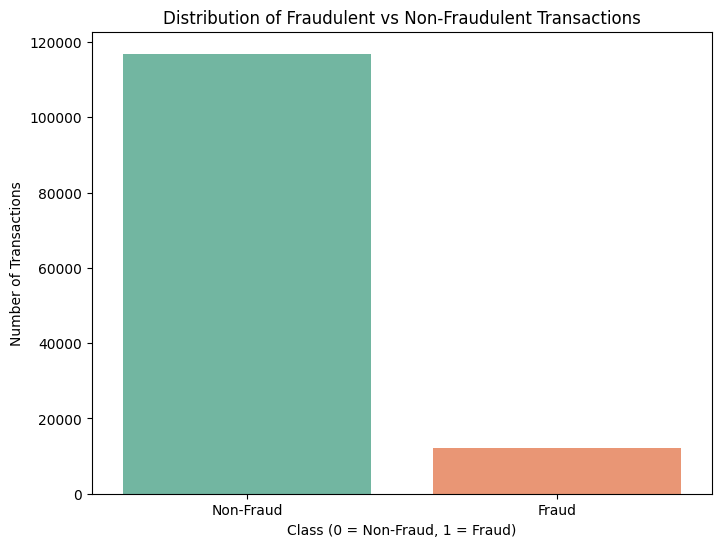

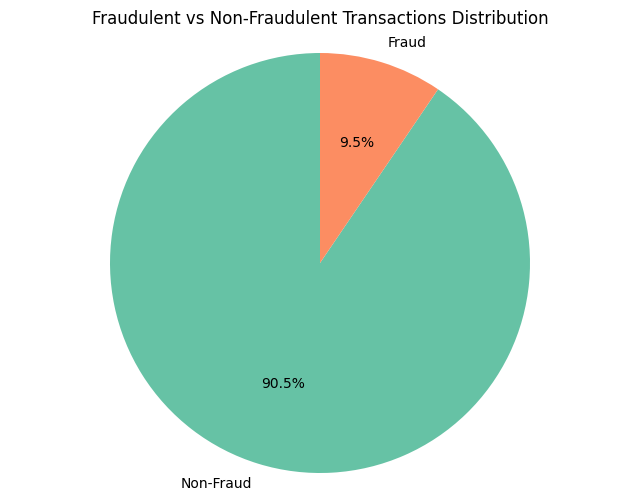

In [56]:
ed.plot_class_distribution(merged_data, class_distribution)

In [57]:
ed.calculate_source_distribution(merged_data) 

2024-10-29 06:51:21,522 - INFO - Calculating source distribution...
2024-10-29 06:51:21,541 - INFO - Source distribution calculated: {'SEO': 51960, 'Ads': 51067, 'Direct': 26119}


(source
 SEO       51960
 Ads       51067
 Direct    26119
 Name: count, dtype: int64,
 source
 SEO       40.233534
 Ads       39.542069
 Direct    20.224397
 Name: count, dtype: float64)

In [58]:
 # Calculate source distribution
source_distribution, source_percentage = ed.calculate_source_distribution(merged_data)
print(source_distribution)

2024-10-29 06:51:21,695 - INFO - Calculating source distribution...
2024-10-29 06:51:21,707 - INFO - Source distribution calculated: {'SEO': 51960, 'Ads': 51067, 'Direct': 26119}
source
SEO       51960
Ads       51067
Direct    26119
Name: count, dtype: int64


2024-10-29 06:51:21,882 - INFO - Plotting source distribution...


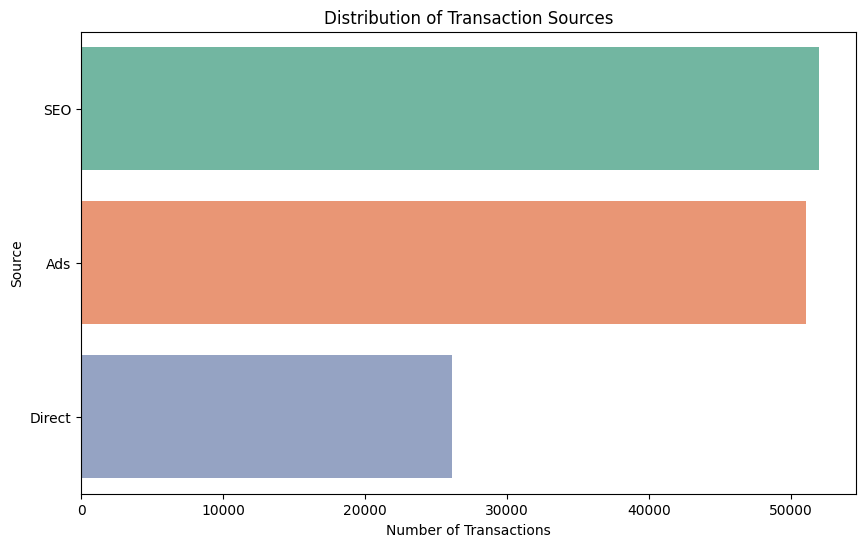

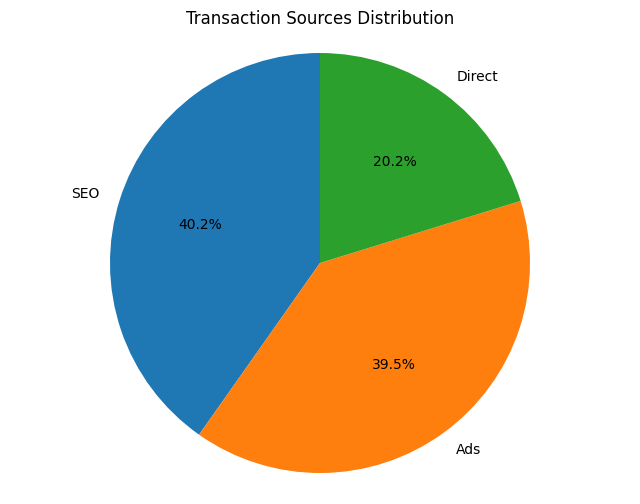

2024-10-29 06:51:22,329 - INFO - Source distribution plotted successfully.


In [59]:
ed.plot_source_distribution(source_distribution)

In [60]:
sex_distribution, sex_percentage = ed.calculate_sex_distribution(merged_data)

2024-10-29 06:51:22,354 - INFO - Calculating sex distribution...
2024-10-29 06:51:22,370 - INFO - Sex distribution calculated: {'M': 75441, 'F': 53705}


2024-10-29 06:51:22,458 - INFO - Plotting sex distribution...


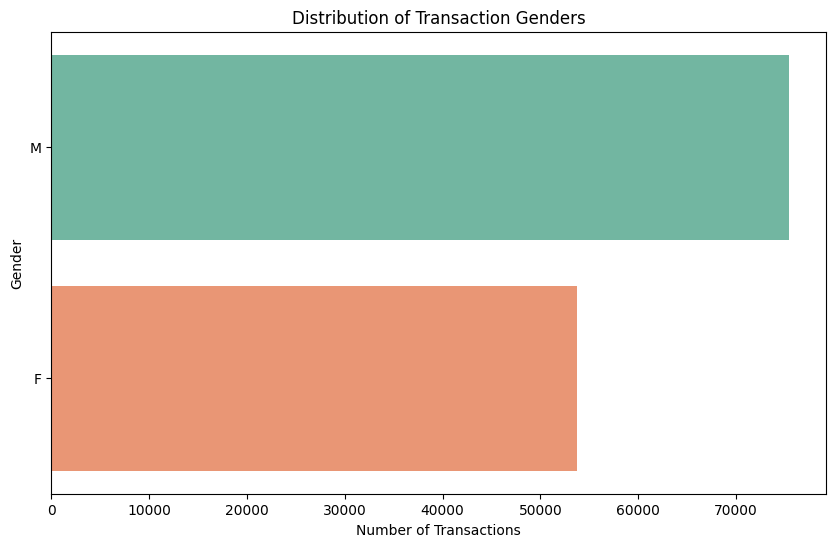

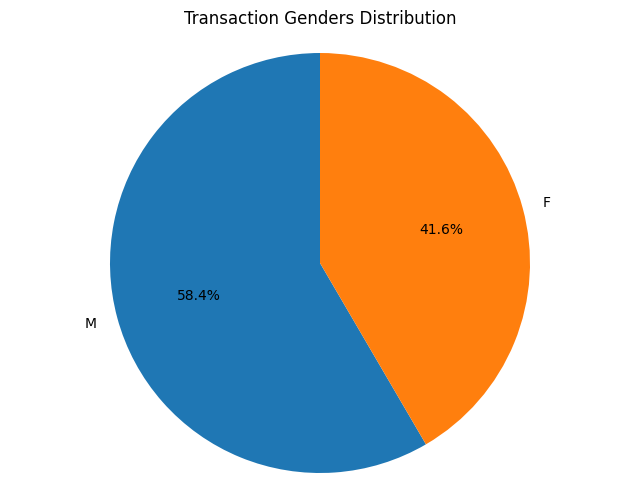

2024-10-29 06:51:22,817 - INFO - Sex distribution plotted successfully.


In [61]:
ed.plot_sex_distribution(sex_distribution)

In [62]:
ed.calculate_age_statistics(merged_data)

2024-10-29 06:51:22,833 - INFO - Calculating age statistics...
2024-10-29 06:51:22,845 - INFO - Age statistics calculated: Mean=33.13, Median=33.00, Std Dev=8.62


mean       33.128413
median     33.000000
std_dev     8.615297
dtype: float64

2024-10-29 06:51:22,967 - INFO - Plotting age distribution...


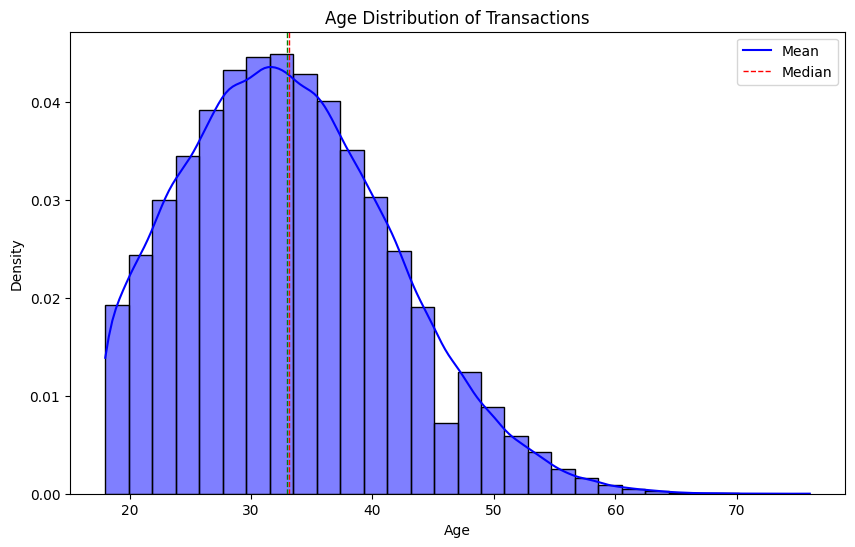

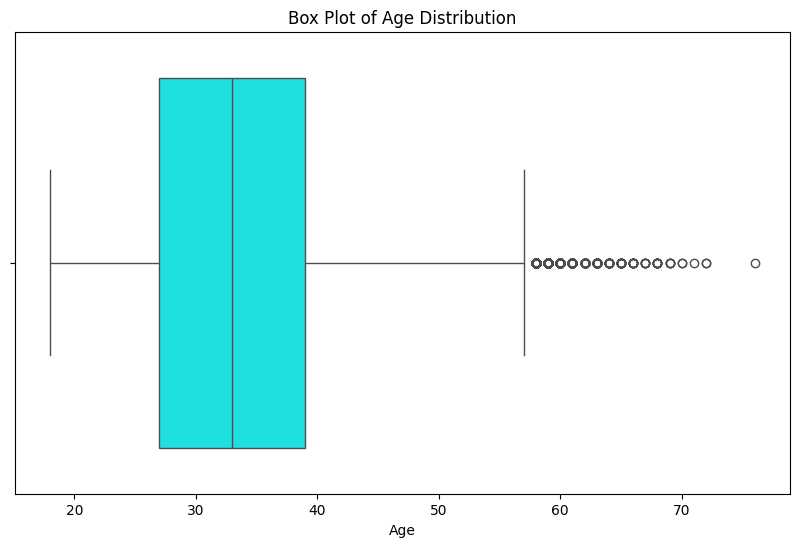

2024-10-29 06:51:25,136 - INFO - Age distribution plotted successfully.


In [63]:
ed.plot_age_distribution(merged_data)

here we have enough information to know the catagorical data overview in general before going through the fraudulent behaviour of each catagories

so the next is bivariate analysis 

In [64]:
ed.analyze_fraud_by_source(merged_data)

AttributeError: module 'Eda' has no attribute 'analyze_fraud_by_source'